In [1]:
import numpy as np 

normal_train = np.load('./npy/normal_train.npy', allow_pickle=True)

print(normal_train.shape)

(6036, 128, 128, 1)


In [2]:
# real = 0, normal = 0 으로 normal_train 개수에 맞춰서 생성 
real = np.zeros(normal_train.shape[0])
normal= np.zeros(normal_train.shape[0])

In [3]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 
from keras.layers import concatenate, Conv2DTranspose, Reshape
from os import path

def whole_model():
    inputs = Input((128,128,1))
    depth = 16
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.25)(pool2)

    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(0.25)(pool3)

    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(0.25)(pool4)

    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    pool5 = Dropout(0.25)(pool5)

    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(pool5)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

#     pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
#     pool6 = Dropout(0.25)(pool6)
    
#     c_conv_output = pool6
#     dense1 = Flatten()(c_conv_output)
#     dense2 = Dense(int(depth*32), activation='relu')(dense1)
#     dense2 = BatchNormalization()(dense2)
#     c_outputs = Dense(2, activation='softmax')(dense2)
#     c_model_ = Model(inputs=[inputs], outputs=[c_outputs], name='classify_model')


    up7 = concatenate([Conv2DTranspose(int(depth*32), (2, 2), strides=(2, 2), padding='same')(conv6), conv5], axis=3)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    
    up8 = concatenate([Conv2DTranspose(int(depth*16), (2, 2), strides=(2, 2), padding='same')(conv7), conv4], axis=3)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up9 = concatenate([Conv2DTranspose(int(depth*8), (2, 2), strides=(2, 2), padding='same')(conv8), conv3], axis=3)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    
    up10 = concatenate([Conv2DTranspose(int(depth*4), (2, 2), strides=(2, 2), padding='same')(conv9), conv2], axis=3)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(up10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)    
    
    up11 = concatenate([Conv2DTranspose(int(depth*2), (2, 2), strides=(2, 2), padding='same')(conv10), conv1], axis=3)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(up11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)    
    
    conv12 = Conv2D(1, (1, 1), activation='tanh')(conv11)
    g_model = Model(inputs=[inputs], outputs=[conv12])

    return g_model

Using TensorFlow backend.


In [4]:
g_model = whole_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
from IPython.display import clear_output
from keras.callbacks import Callback
import matplotlib.pyplot as plt

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):

        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.x_ = []
        self.accuracy = []
        self.val_accuracy = []
        
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.ylim(0, 1)
        plt.plot(self.x, self.losses, label="loss")
        plt.ylim(0, 1)
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.ylim(0, 1)
        plt.plot(self.x, self.accuracy, label="accuracy")
        plt.ylim(0, 1)
        plt.plot(self.x, self.val_accuracy, label="val_accuracy")
        plt.legend()
        plt.show()

        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])
        print("accuracy = ", self.accuracy[-1], ", val_accuracy = ", self.val_accuracy[-1])


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 학습 중에 loss 그리기
plot_losses = PlotLosses()

# overfitting이 발생하면 학습 중지
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# 학습 실행하면서 학습율 감소시키기
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [plot_losses, reduce_lr]

In [7]:
g_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [8]:
import keras 


c_model  = keras.models.load_model('./models/eq_c_model.h5')
c_model.trainable = False

for layer in c_model.layers:
    layer.trainable = False

d_model  = keras.models.load_model('./models/gan_d_model.h5')
d_model.trainable = False

for layer in d_model.layers:
    layer.trainable = False

g_model.trainable = True

/home/hiwony/.local/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
inputs = Input((128,128,1))
generated = g_model(inputs)
d_output = d_model(generated)
c_output = c_model(generated)

In [10]:
import keras.backend as K

d_r = 0.0005 
u_r = 0.999
c_r = 0.0005

def custom_loss(y_true, y_pred):
    return c_r * K.mean(c_output) + u_r * K.mean(keras.losses.mean_squared_error(inputs, generated)) + d_r * K.mean(d_output)

whole_model = Model(inputs=[inputs], outputs=[d_output, c_output])

whole_model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])
whole_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128, 128, 1)  4294849     input_2[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            1604609     model_1[1][0]                    
__________________________________________________________________________________________________
model_5 (Model)                 (None, 2)            12078674    model_1[1][0]                    
Total params: 17,978,132
Trainable params: 4,288,833
Non-trainable params: 13,689,299
______

In [11]:
whole_model.fit(normal_train, [real, normal], validation_split=0.1, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)

Train on 5432 samples, validate on 604 samples
Epoch 1/20
5432/5432 [==============================] - 61s 11ms/step - loss: 0.1519 - model_2_loss: 0.0759 - model_5_loss: 0.0759 - model_2_accuracy: 0.1880 - model_5_accuracy: 0.4891 - val_loss: 0.2326 - val_model_2_loss: 0.1163 - val_model_5_loss: 0.1163 - val_model_2_accuracy: 0.0000e+00 - val_model_5_accuracy: 0.0017
Epoch 2/20
5432/5432 [==============================] - 47s 9ms/step - loss: 0.0236 - model_2_loss: 0.0118 - model_5_loss: 0.0118 - model_2_accuracy: 0.0000e+00 - model_5_accuracy: 0.5142 - val_loss: 0.0577 - val_model_2_loss: 0.0288 - val_model_5_loss: 0.0288 - val_model_2_accuracy: 0.4073 - val_model_5_accuracy: 0.1639
Epoch 3/20
5432/5432 [==============================] - 47s 9ms/step - loss: 0.0171 - model_2_loss: 0.0085 - model_5_loss: 0.0085 - model_2_accuracy: 7.3638e-04 - model_5_accuracy: 0.5239 - val_loss: 0.0196 - val_model_2_loss: 0.0098 - val_model_5_loss: 0.0098 - val_model_2_accuracy: 0.9967 - val_model_5_

In [12]:
# 모델 저장
whole_model.save('./models/whole_model.h5')

In [13]:
X_train_c, X_test, Y_train_c, Y_test = np.load('./npy/classify_train.npy', allow_pickle=True)

print('X_train', X_train_c.shape)
print('X_test ', X_test.shape)
print('Y_train', Y_train_c.shape)
print('Y_test ', Y_test.shape)

X_train (10864, 128, 128, 1)
X_test  (1208, 128, 128, 1)
Y_train (10864, 1)
Y_test  (1208, 1)


## Whole 학습 결과

* Input is classified as (Normal, Fracture) : Input Image의 정답
* classified as (Normal, Fracture) : Input Image의 분류 (0:Noraml, 1:Fracture)
* Generated is Discriminated as (Real, Fake) : Generated Image의 판별 (0:Real, 1:Fake)
* Generated is classified as (Noraml, Fracture) : Generated Image의 분류 (0:Noraml, 1:Fracture)


* 최종목표 : Input은 Fracture or Normal 이여도 Generated Image는 Normal이 출력되야된다. 
input = S
1. S(골절) -> G(비골절) = Fracture area (area 출력)
2. S(비골절) -> G(비골절) = Fracture area (미표기) 

In [14]:
# Util 함수

def show_result(target_data=X_test, count=10, threshold=0.2):

    shuffled_index = np.random.permutation(X_test.shape[0])
    shuffled_index = np.arange(0,count)
    model_input_shape = (1,128, 128, 1)

    for i in range(count):
        cl_ = Y_test[i]
        target_input = target_data[shuffled_index[i]]
        c_out = c_model.predict(target_input.reshape(model_input_shape)) 
        g_out = g_model.predict(target_input.reshape(model_input_shape))
        d_out = d_model.predict(g_out)
        c_out_g_in = c_model.predict(g_out)
        
        diff = np.absolute(g_out[0] - target_input)
        diff[diff < threshold] = 0.0

        # 실제 이미지
        if Y_test[i] == 0 :
            print('Input is classified as Normal Image %.1f' % Y_test[i], '(0 : Normal, 1 : Fracture)')
        else : 
            print('Input is classified as Fracture Image %.1f' % Y_test[i], '(0 : Normal, 1 : Fracture)')

        # classify  0 normal, 1 fracture 
        if c_out[0][1] <= 0.5 :  
            print('Classified as Normal Image %.2f' % c_out[0][1], '(0 : Normal, 1 : Fracture)')
        else :
            print('Classified as Fractrue Image %.2f' % c_out[0][1], '(0 : Normal, 1 : Fracture)')
        
        # discriminator 0 real 1 fake 디스크리미네이터의 진짜와 가짜
        d_out_ = np.argmax(d_out, axis = 1)
        if d_out_ <= 0.5 :  
            print('Generated is Discriminated as Real Image %.2f' % d_out_, '(0 : Real, 1 : Fake)')
        else : 
            print('Generated is Discriminated as Fake Image %.2f' % d_out_, '(0 : Real, 1 : Fake)')            
        
        # generator_classify 0 normal, 1 fracture
        if c_out_g_in[0][1] <= 0.5 :  
            print('Generated is classified as Normal Image %.2f' % c_out_g_in[0][1], '(0 : Normal, 1 : Fracture)')
        else :
            print('Generated is classified as Fracture Image %.2f' % c_out_g_in[0][1], '(0 : Normal, 1 : Fracture)')
        
            
        plt.figure(figsize=(10,10))
        plt.subplot(1,3,1)
        plt.title('Input img')
        plt.axis('off')
        plt.imshow(target_input.reshape((128,128)),cmap='gray' , vmin=0, vmax=1)
        
        plt.subplot(1,3,2)
        plt.title('Generated img')
        plt.axis('off')
        plt.imshow(g_out[0].reshape((128,128)),cmap='gray', vmin=0, vmax=1)
        
        plt.subplot(1,3,3)
        plt.title('Fracture area')
        plt.axis('off')
        plt.imshow(diff.reshape((128,128)),cmap='gray', vmin=0, vmax=1)
        plt.show()
        plt.close()
        print()
#cmap=plt.cm.binary
# show_result(X_test)

Input is classified as Fracture Image 1.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.27 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.23 (0 : Normal, 1 : Fracture)


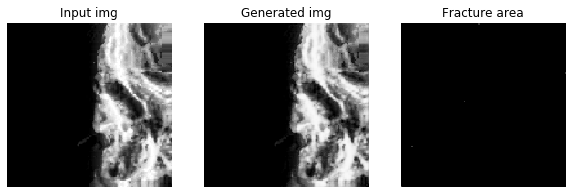


Input is classified as Fracture Image 1.0 (0 : Normal, 1 : Fracture)
Classified as Fractrue Image 1.00 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.00 (0 : Normal, 1 : Fracture)


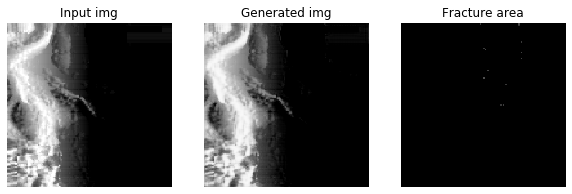


Input is classified as Fracture Image 1.0 (0 : Normal, 1 : Fracture)
Classified as Fractrue Image 1.00 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.00 (0 : Normal, 1 : Fracture)


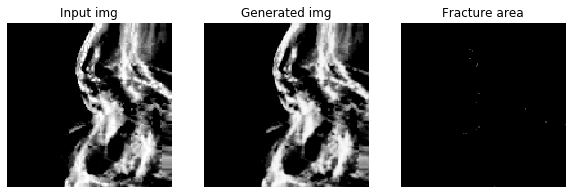


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.02 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.01 (0 : Normal, 1 : Fracture)


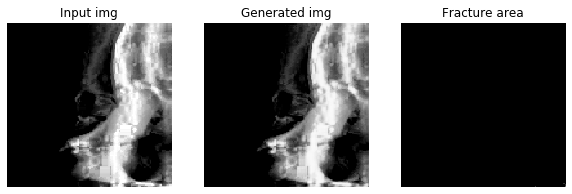


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.34 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.75 (0 : Normal, 1 : Fracture)


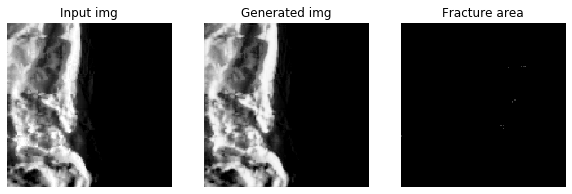


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Fractrue Image 1.00 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.00 (0 : Normal, 1 : Fracture)


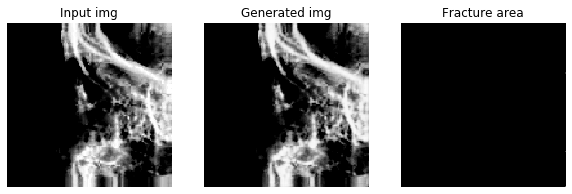


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.15 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.10 (0 : Normal, 1 : Fracture)


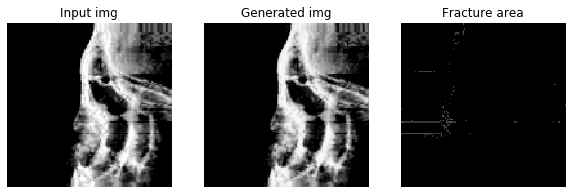


Input is classified as Fracture Image 1.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.01 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.01 (0 : Normal, 1 : Fracture)


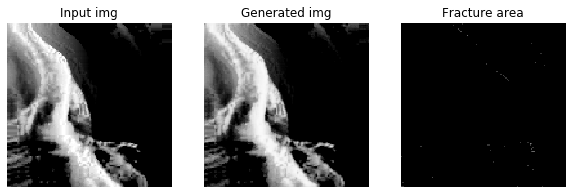


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Fractrue Image 0.93 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.98 (0 : Normal, 1 : Fracture)


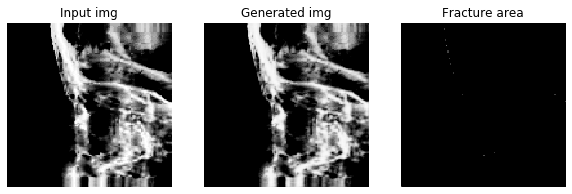


Input is classified as Normal Image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.00 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real Image 0.00 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.00 (0 : Normal, 1 : Fracture)


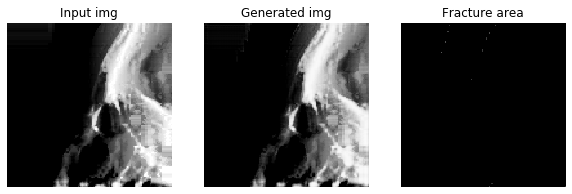

In [15]:
show_result(X_test, threshold=2.0)